In [77]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [78]:
PERPLEXITY=20
ITERATION_N =2000
RANDOM_STATE = 42

In [79]:
df = pd.read_csv(r"C:\Users\prAsann\Desktop\Capstone Project\Fourier_Transformed_WCT.csv")

In [80]:
df.head()

,Patient ID,Comments of Patients,Unnamed: 2,Unnamed: 3,I-Raw,I-raw(real),I-raw(imag),II-Raw,II-raw(real),II-raw(imag),...,UV4(imag),UV5,UV5(real),UV5(imag),UV6,UV6(real),UV6(imag),WCT,WCT(real),WCT(imag)
0,patient001,Age: 46,Sex: M,Diagnosis report: Non ST segment elevation myo...,0.1832743937389645-0.38316677887422790.0157715...,0.1832743937389645,0.38316677887422790.0157715527837506420.173699...,0.08839254698785978-0.46058494392519740.018574...,0.08839254698785978,0.46058494392519740.018574163208737690.2102984...,...,0.470722063741797370.024206860631505780.216772...,-0.054040679304980195-0.57966340138374240.0219...,0.054040679304980195,0.57966340138374240.0219537816623985440.267167...,-0.1948170631050768-0.691155369173090.02956479...,0.1948170631050768,0.691155369173090.029564792326333960.326568174...,-0.3170091969449017-0.79643426352645690.029001...,0.3170091969449017,0.79643426352645690.029001522584057150.3786583...
1,patient002,Age: 74,Sex: F,Diagnosis report: Coronary artery disease,-1.627792634242524-1.88706324161069162.3825633...,1.627792634242524,1.88706324161069162.382563390852816,-1.6286314086073046-1.91241947436653842.375533...,1.6286314086073046,1.91241947436653842.3755332803069313,...,1.89017171147568172.3721484122663203,-1.6131644093207493-1.91637167176631132.368489...,1.6131644093207493,1.91637167176631132.3684894658418543,-1.6213172961464173-1.9433709528793672.3583622...,1.6213172961464173,1.9433709528793672.3583622695584063,-1.6199081552135859-1.95860245521781782.350756...,1.6199081552135859,1.95860245521781782.350756594406426
2,patient003,Age: 55,Sex: M,Diagnosis report: Non ST segment elevation myo...,2.0833024665065247-2.0911828422004763-3.156475...,2.0833024665065247,2.0911828422004763,2.081892144201671-2.096825042148551-3.16831246...,2.081892144201671,2.096825042148551,...,2.074290231512567,2.0813280152797295-2.070347489380177-3.1404432...,2.0813280152797295,2.070347489380177,2.07794324174808-2.068665026142649-3.137636860...,2.07794324174808,2.068665026142649,2.079353564052934-2.066404747247788-3.13677549...,2.079353564052934,2.066404747247788
3,patient004,Age: 69,Sex: F,Diagnosis report: Atypical chest pain,-2.436623894737715-1.62188741251763210.8093928...,2.436623894737715,1.62188741251763210.80939286942137072.52163388...,-2.451270720916812-1.59400154792727040.8423342...,2.451270720916812,1.59400154792727040.84233429023056482.57371201...,...,1.63144828037718480.93607914990298792.58976441...,-2.5540195883392327-1.60668107982672480.918064...,2.5540195883392327,1.60668107982672480.91806469944535232.61453000...,-2.5120688673206115-1.5785220475832330.9011707...,2.5120688673206115,1.5785220475832330.90117070547782532.622438914...,-2.4898222728410393-1.5790911468605870.8718894...,2.4898222728410393,1.5790911468605870.87188944253631942.624114529...
4,patient005,Age: 87,Sex: M,Diagnosis report: Atrial fibrillation,-3.761482251302726-4.388166234759397-0.5582724...,3.761482251302726,4.388166234759397,-3.7668295119824955-4.395488174341192-0.559104...,3.7668295119824955,4.395488174341192,...,4.409008581293819,-3.7459974755842267-4.396049910446674-0.581074...,3.7459974755842267,4.396049910446674,-3.7510662331035918-4.408446845188338-0.589796...,3.7510662331035918,4.408446845188338,-3.755577984302147-4.4081562920303305-0.587553...,3.755577984302147,4.4081562920303305


In [81]:
features = ['I-raw(real)','I-raw(imag)','II-raw(real)','II-raw(imag)','III-raw(real)','III-raw(imag)','V1-Raw(real)',
            'V1-Raw(imag)','V2-Raw(real)','V2-Raw(imag)','V3-Raw(real)','V3-Raw(imag)','V4-Raw(real)','V4-Raw(imag)',
            'V5-Raw(real)','V5-Raw(imag)','V6-Raw(real)','V6-Raw(imag)','LA-Raw(real)','LA-Raw(imag)','RA-Raw(real)',
            'RA-Raw(imag)','LL-Raw(real)','LL-Raw(imag)','UV1-Raw(real)','UV1-Raw(imag)','UV2-Raw(real)','UV2-Raw(imag)',
            'UV3-Raw(real)','UV3-Raw(imag)','UV4-Raw(real)','UV4-Raw(imag)','UV5-Raw(real)','UV5-Raw(imag)',
            'UV6-Raw(real)','UV6-Raw(imag)','I(real)','I(imag)','II(real)','II(imag)','III(real)','III(imag)','V1(real)',
            'V1(imag)','V2(real)','V2(imag)','V3(real)','V3(imag)','V4(real)','V4(imag)','V5(real)','V5(imag)',
            'V6(real)','V6(imag)','LA(real)','LA(imag)','RA(real)','RA(imag)','LL(real)','LL(imag)','UV1(real)',
            'UV1(imag)','UV2(real)','UV2(imag)','UV3(real)','UV3(imag)','UV4(real)','UV4(imag)','UV5(real)',
            'UV5(imag)','UV6(real)','UV6(imag)','WCT(real)','WCT(imag)']

In [82]:
temp = pd.DataFrame(df[features])
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   I-raw(real)    92 non-null     object
 1   I-raw(imag)    92 non-null     object
 2   II-raw(real)   92 non-null     object
 3   II-raw(imag)   92 non-null     object
 4   III-raw(real)  92 non-null     object
 5   III-raw(imag)  92 non-null     object
 6   V1-Raw(real)   92 non-null     object
 7   V1-Raw(imag)   92 non-null     object
 8   V2-Raw(real)   92 non-null     object
 9   V2-Raw(imag)   92 non-null     object
 10  V3-Raw(real)   92 non-null     object
 11  V3-Raw(imag)   92 non-null     object
 12  V4-Raw(real)   92 non-null     object
 13  V4-Raw(imag)   92 non-null     object
 14  V5-Raw(real)   92 non-null     object
 15  V5-Raw(imag)   92 non-null     object
 16  V6-Raw(real)   92 non-null     object
 17  V6-Raw(imag)   92 non-null     object
 18  LA-Raw(real)   92 non-null     o

In [83]:
def modify_data(data):
    y = data
    result=[]
    for x in y:
        if len(x)>=5:
            new = x.split('.')
            i = new[0]+'.'+new[1]
            j = float(i)
            result.append(j)
    return result

In [84]:
temp.head()

,I-raw(real),I-raw(imag),II-raw(real),II-raw(imag),III-raw(real),III-raw(imag),V1-Raw(real),V1-Raw(imag),V2-Raw(real),V2-Raw(imag),...,UV3(real),UV3(imag),UV4(real),UV4(imag),UV5(real),UV5(imag),UV6(real),UV6(imag),WCT(real),WCT(imag)
0,0.1832743937389645,0.38316677887422790.0157715527837506420.173699...,0.08839254698785978,0.46058494392519740.018574163208737690.2102984...,0.04307790481132811,0.56615814175711080.0233688251612890650.264073...,0.18382667456987897,0.6832745760253460.0270232093428898240.3226264...,0.30347831658749735,0.79278817043113140.023080321146952160.3783720...,...,0.17314004049168413,0.39188143187785340.0171728579962441670.181021...,0.07883808861303958,0.470722063741797370.024206860631505780.216772...,0.054040679304980195,0.57966340138374240.0219537816623985440.267167...,0.1948170631050768,0.691155369173090.029564792326333960.326568174...,0.3170091969449017,0.79643426352645690.029001522584057150.3786583...
1,1.627792634242524,1.88706324161069162.382563390852816,1.6286314086073046,1.91241947436653842.3755332803069313,1.6325904236090694,1.9340899499967542.3752454980038835,1.636247479839513,1.95718144042239372.365954240791194,1.6348383389066816,1.97041464070477962.362857155053631,...,1.6052799302918113,1.8760947836585132.370462830205611,1.6072258868181024,1.89017171147568172.3721484122663203,1.6131644093207493,1.91637167176631132.3684894658418543,1.6213172961464173,1.9433709528793672.3583622695584063,1.6199081552135859,1.95860245521781782.350756594406426
2,2.0833024665065247,2.0911828422004763,2.081892144201671,2.096825042148551,2.0740199815182137,2.1106076450337565,2.0711993369085056,2.1100468239545807,2.0824562731236127,2.1058321685716814,...,2.0833024665065247,2.061629270785713,2.0799176929748753,2.074290231512567,2.0813280152797295,2.070347489380177,2.07794324174808,2.068665026142649,2.079353564052934,2.066404747247788
3,2.436623894737715,1.62188741251763210.80939286942137072.52163388...,2.451270720916812,1.59400154792727040.84233429023056482.57371201...,2.4760321478158143,1.55571254854687150.90398429621965372.63198992...,2.4957362743548637,1.53488351499570340.93551892165793362.66466442...,2.494050507568213,1.51068541372259760.94790619063191252.67816988...,...,2.5540195883392327,1.63229054730766920.92397821980981462.55571590...,2.584142306330206,1.63144828037718480.93607914990298792.58976441...,2.5540195883392327,1.60668107982672480.91806469944535232.61453000...,2.5120688673206115,1.5785220475832330.90117070547782532.622438914...,2.4898222728410393,1.5790911468605870.87188944253631942.624114529...
4,3.761482251302726,4.388166234759397,3.7668295119824955,4.395488174341192,3.7589571559817236,4.397173382657638,3.7648614229823028,4.401124905606543,3.7651399261427074,4.405347611502922,...,3.7521988126225705,4.398025671921126,3.7536098953019543,4.409008581293819,3.7459974755842267,4.396049910446674,3.7510662331035918,4.408446845188338,3.755577984302147,4.4081562920303305


In [85]:
new_df = temp.apply(modify_data)
new_df.shape

(92, 74)

In [86]:
tsne = TSNE(n_components=2, perplexity=PERPLEXITY, n_iter=ITERATION_N, random_state=RANDOM_STATE)
points = tsne.fit_transform(new_df)
x_point = points[:,0]
y_point = points[:,1]
points.shape

(92, 2)

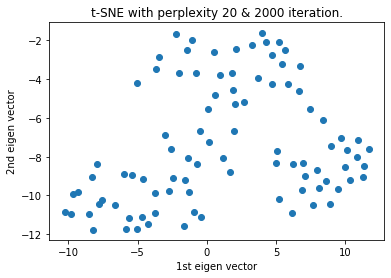

In [87]:
plt.scatter(x_point,y_point)
plt.xlabel("1st eigen vector")
plt.ylabel("2nd eigen vector")
plt.title(f"t-SNE with perplexity {PERPLEXITY} & {ITERATION_N} iteration.")
plt.show()

In [88]:
import plotly as py
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interact
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Set-Up offline mode
py.offline.init_notebook_mode(connected=True)

In [89]:
def f(Perplexity,Iteration):
    tsne = TSNE(n_components=2, perplexity=Perplexity, n_iter=Iteration, random_state=RANDOM_STATE)
    points = tsne.fit_transform(new_df)
    x_point = points[:,0]
    y_point = points[:,1]
    trace = go.Scatter(
        x = x_point,
        y = y_point,
        mode = 'markers')
    data = [trace]
    iplot(data)
interact(f,Perplexity=(0,50),Iteration=(500,5000))


interactive(children=(IntSlider(value=25, description='Perplexity', max=50), IntSlider(value=2750, description…

<function __main__.f(Perplexity, Iteration)>

## K-Means clustering

### Import Dataset 

In [90]:
dataset = new_df
X = dataset.iloc[:,[-1,-2]].values
X

array([[7.96434264e-01, 3.17009197e-01],
       [1.95860246e+00, 1.61990816e+00],
       [2.06640475e+00, 2.07935356e+00],
       [1.57909115e+00, 2.48982227e+00],
       [4.40815629e+00, 3.75557798e+00],
       [3.39887860e+00, 1.81022191e+00],
       [1.06586879e+00, 4.50096849e-03],
       [3.05598732e+00, 7.25776238e-01],
       [9.99343056e-02, 2.42084284e+00],
       [2.84618231e-01, 2.85739654e-01],
       [6.01707229e+00, 2.18381730e+00],
       [3.54245323e+00, 3.17505631e+00],
       [1.22043224e+00, 2.65480756e+00],
       [8.50126473e+00, 2.55262537e+00],
       [4.90166499e+00, 2.23871348e+00],
       [2.99574102e+00, 2.18605431e+00],
       [2.21928224e+00, 2.41718489e+00],
       [4.53419512e-02, 1.38174172e+00],
       [3.83892279e+00, 1.97546143e+00],
       [8.39243038e-01, 3.10891144e+00],
       [3.94194282e+00, 3.32032473e+00],
       [2.79471826e+00, 5.08636272e+00],
       [9.17358189e+00, 1.83841315e-01],
       [2.83386009e+00, 1.70014667e+00],
       [1.876944

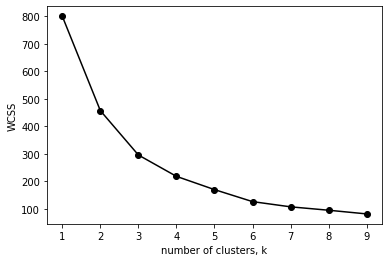

In [91]:
from sklearn.cluster import KMeans
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, init= 'k-means++', random_state = 42)
    
    # Fit model to samples
    model.fit(new_df.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('WCSS')
plt.xticks(ks)
plt.show()

### Training K-Means Model 

In [92]:
kmeans = KMeans(n_clusters=3, init= 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       1, 2, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0,
       0, 0, 2, 0, 1, 1, 0, 2, 2, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

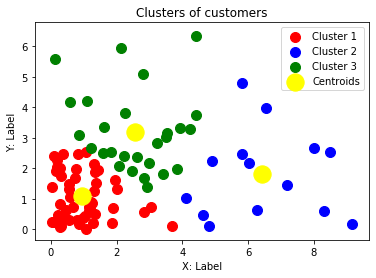

In [93]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('X: Label')
plt.ylabel('Y: Label')
plt.legend()
plt.show()

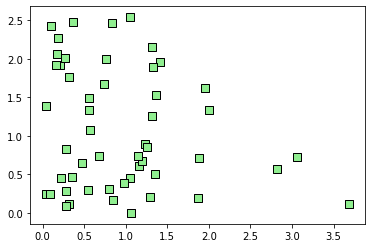

In [94]:
plt.scatter(
    X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

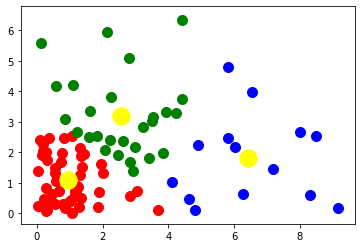

In [95]:
plt.scatter(X[ y_kmeans== 0,0], X[y_kmeans== 0, 1], s = 100,c = 'red', label = 'Cluster 1' )
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s = 100,c = 'blue', label = 'Cluster 2' )
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s = 100,c = 'green', label = 'Cluster 3' )
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')